In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
data=pd.read_csv('export_dataframe.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,year,emp_length_int,home_ownership_cat,income_cat,loan_amount,term_cat,purpose_cat,interest_payment_cat,loan_condition,interest_rate,grade_cat,total_pymnt,total_rec_prncp,installment,region
0,4,2,1,1,0,1,1,1,1,2,2,1,1,0,4
1,4,0,1,1,0,2,2,2,0,3,3,0,0,0,0
2,4,2,1,1,0,1,3,2,1,3,3,0,0,0,3
3,4,2,1,1,1,1,4,2,1,2,3,2,2,1,1
4,4,0,1,1,0,2,4,1,1,2,2,0,0,0,1


In [2]:
y=data['loan_condition'].values
y=y.reshape(-1, 1)
data.drop('loan_condition',axis=1,inplace=True)
x=data.values

In [3]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
x=svd.fit_transform(x)
print(x.shape)

(868946, 2)


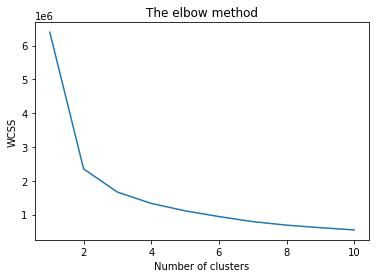

In [4]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

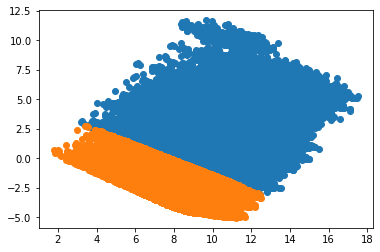

In [5]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
yhat = kmeans.fit_predict(x)
from numpy import unique
from numpy import where
from matplotlib import pyplot
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
pyplot.show()

In [6]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(yhat,y))
confusion_matrix(yhat,y)
precision_recall_fscore_support(yhat,y, average='macro')

0.30870387803154625


(0.5268292390495444, 0.5097233267823305, 0.2831682933067289, None)

In [7]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2)
# fit the model
model.fit(x)
# assign a cluster to each example
yhat = model.predict(x)

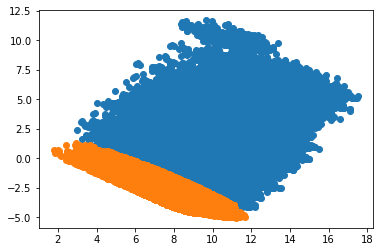

In [8]:
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
pyplot.show()

In [9]:
print(accuracy_score(yhat,y))
confusion_matrix(yhat,y)
precision_recall_fscore_support(yhat,y, average='macro')

0.2880501204908015


(0.5307607871494805, 0.5119270231163935, 0.2686068118832417, None)

In [4]:
from sklearn.cluster import Birch
model = Birch(n_clusters=2)
# fit the model
model.fit(x)
# assign a cluster to each example
yhat = model.predict(x)


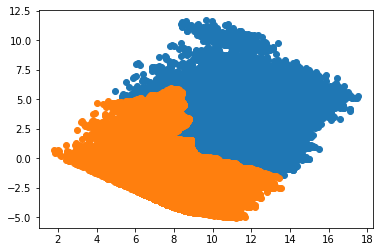

In [6]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
pyplot.show()

In [8]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(yhat,y))
confusion_matrix(yhat,y)
precision_recall_fscore_support(yhat,y, average='macro')

0.3483668720495865


(0.5099186101052655, 0.5032317500213209, 0.3081130369902765, None)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
# fit the model
model.fit(x)
# assign a cluster to each example
yhat = model.predict(x)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(yhat,y))
confusion_matrix(yhat,y)
precision_recall_fscore_support(yhat,y, average='macro')